<a href="https://colab.research.google.com/github/devpatel0005/Car-Price-Prediction/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [89]:
df=pd.read_csv('https://raw.githubusercontent.com/devpatel0005/Car-Price-Prediction/refs/heads/main/CarPrice_Assignment.csv')

In [90]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [91]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [93]:
df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


# Univariate Analysis

In [94]:
df.duplicated().sum()

np.int64(0)

In [95]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [96]:
num_cols

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [97]:
cat_cols

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [98]:
df['CarName']=df['CarName'].apply(lambda x: x.split(' ')[0])

In [99]:
df['CarName'].value_counts()

,count
CarName,
toyota,31
nissan,17
mazda,15
honda,13
mitsubishi,13
subaru,12
volvo,11
peugeot,11
dodge,9


In [100]:
df.drop_duplicates()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


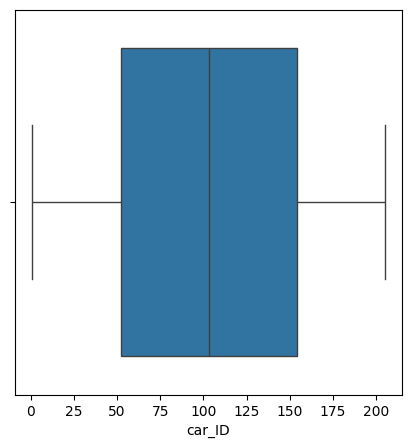

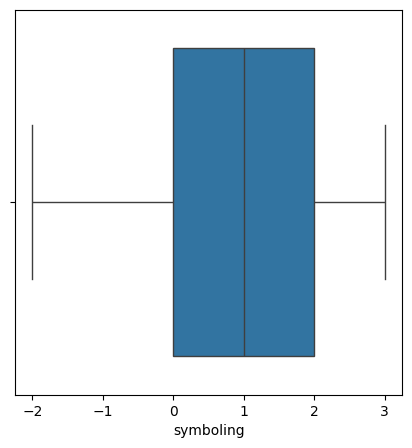

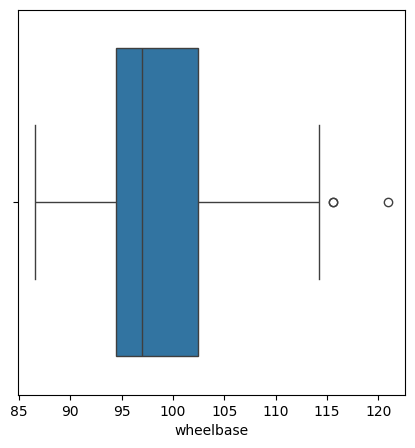

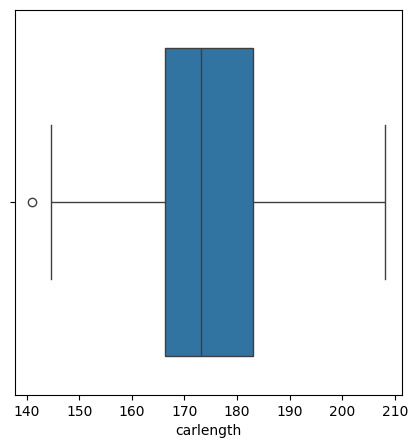

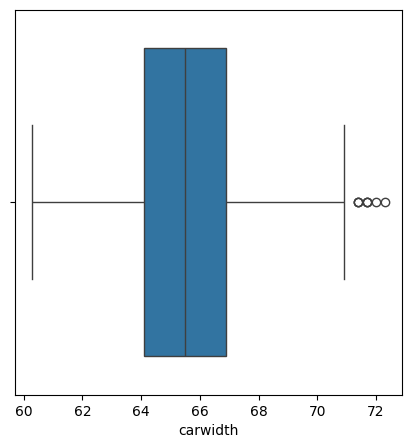

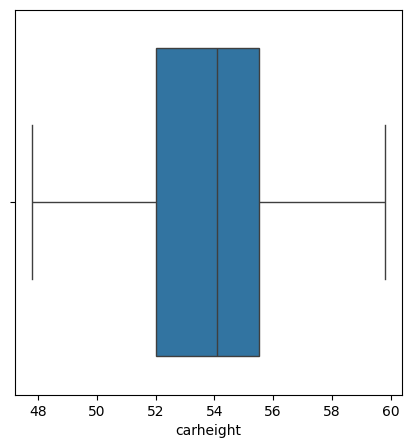

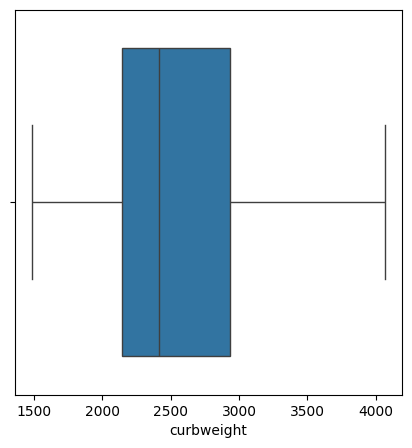

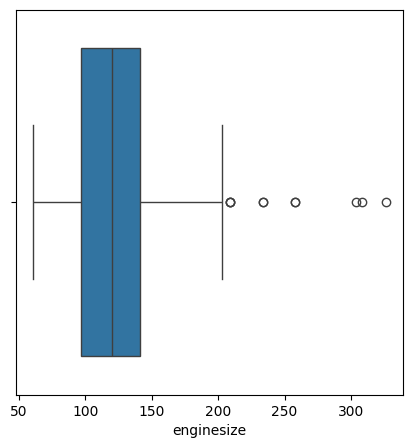

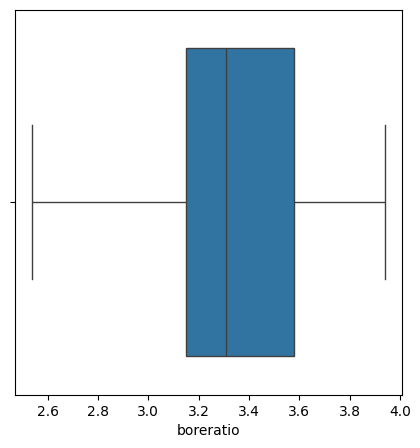

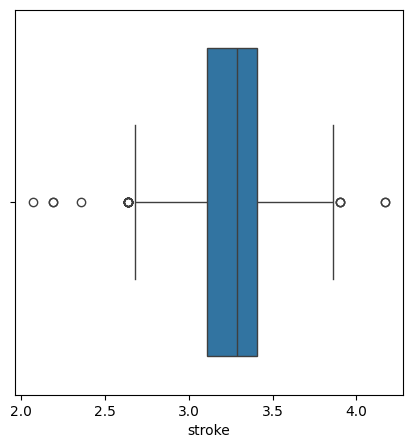

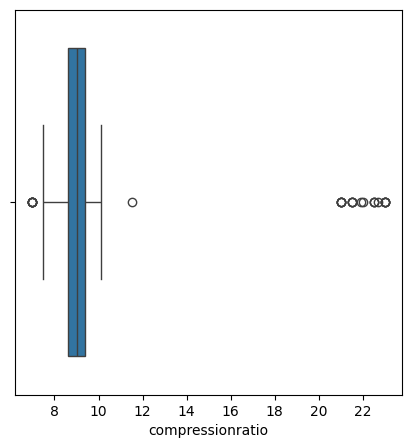

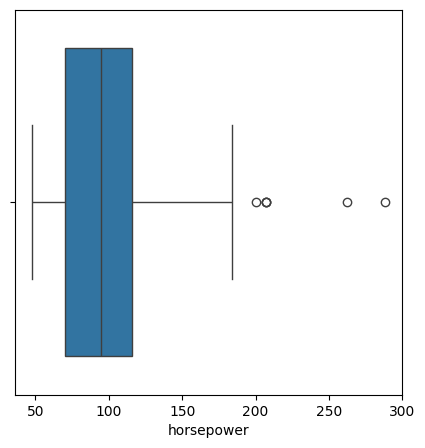

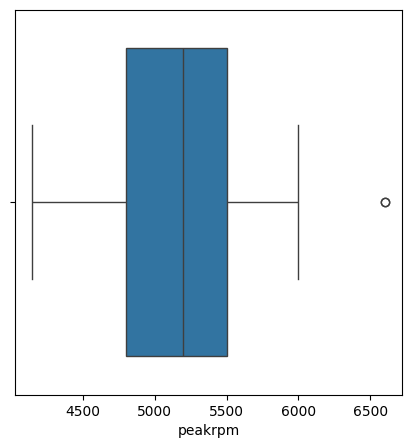

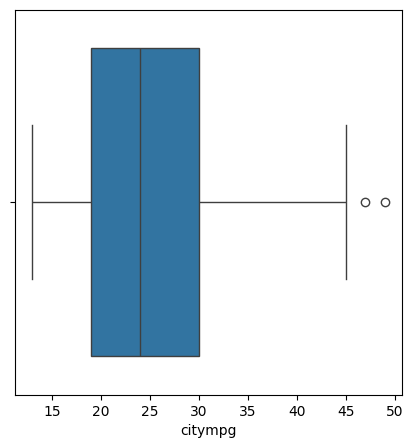

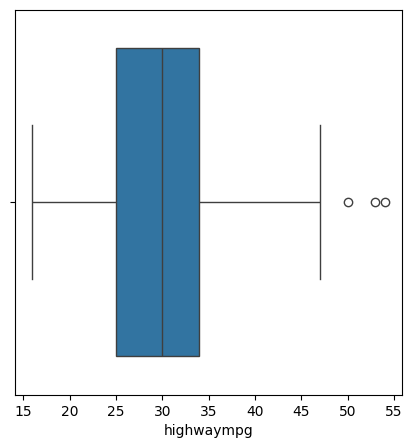

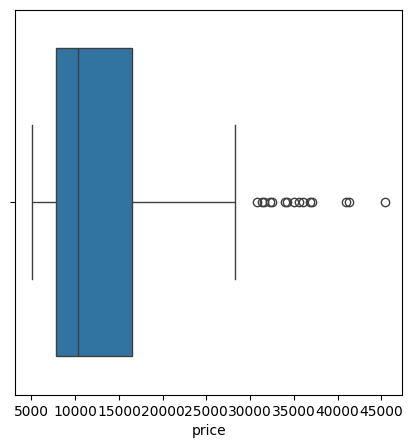

In [101]:
for i in num_cols:
  plt.figure(figsize=(5,5))
  sns.boxplot(data=df,x=i)
  plt.show()

In [102]:
'''
outlier_cols=['carwidth','enginesize','stroke','compressionratio','peakrpm']
def manage_outlier(df,cols):
  for i in cols:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    df=df[(df[i]>=lower) & (df[i]<=upper)]
  return df
df = manage_outlier(df,outlier_cols)
print(df[outlier_cols].head())
'''

"\noutlier_cols=['carwidth','enginesize','stroke','compressionratio','peakrpm']\ndef manage_outlier(df,cols):\n  for i in cols:\n    q1=df[i].quantile(0.25)\n    q3=df[i].quantile(0.75)\n    iqr=q3-q1\n    lower=q1-1.5*iqr\n    upper=q3+1.5*iqr\n    df=df[(df[i]>=lower) & (df[i]<=upper)]\n  return df\ndf = manage_outlier(df,outlier_cols)\nprint(df[outlier_cols].head())\n"

In [103]:
skew_cols=df[num_cols].skew()[(df[num_cols].skew() > 0.75) | (df[num_cols].skew()< -0.75)].index.tolist()
skew_cols.remove('price')
skew_cols

['wheelbase', 'carwidth', 'enginesize', 'compressionratio', 'horsepower']

In [104]:
for i in skew_cols:
  df[i]=np.log1p(df[i])

In [105]:
df[skew_cols].skew()

,0
wheelbase,0.885024
carwidth,0.815331
enginesize,0.864706
compressionratio,2.379056
horsepower,0.489938


<Axes: >

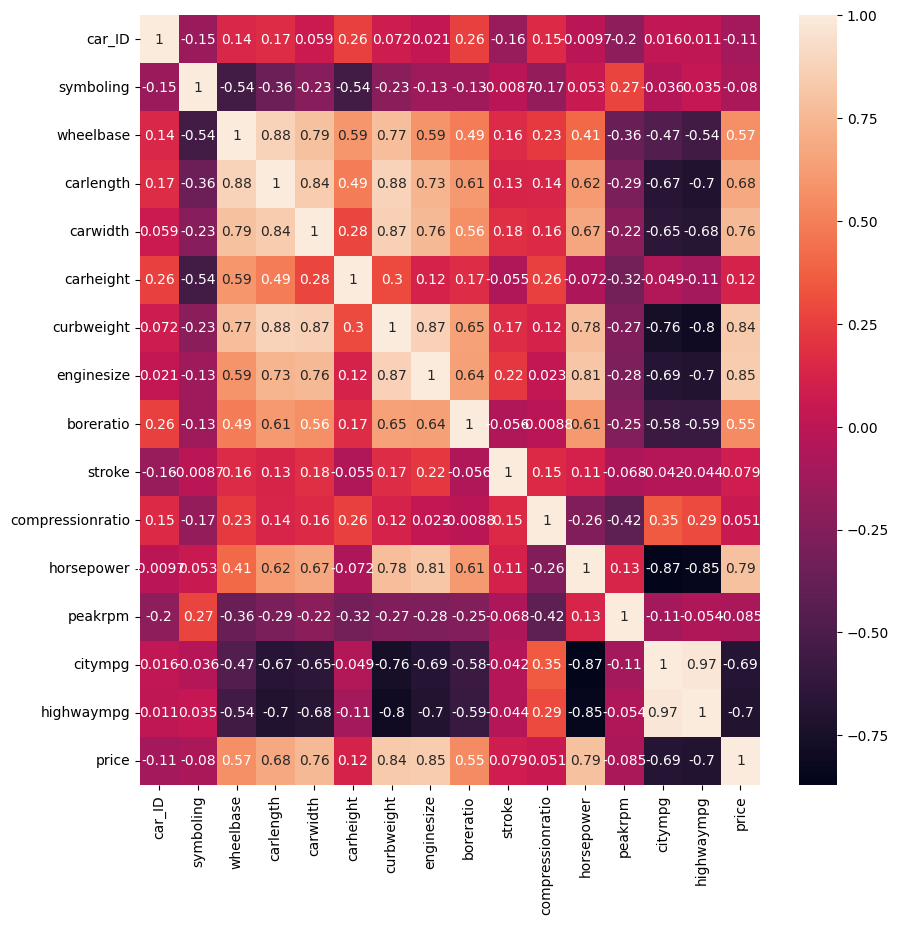

In [106]:
plt.figure(figsize=(10,10))
sns.heatmap(df[num_cols].corr(),annot=True)

In [107]:
df.drop(['car_ID','symboling'],axis=1,inplace=True)

In [108]:
num_cols=num_cols.drop(['car_ID','symboling'])

# now EDA for categorical part

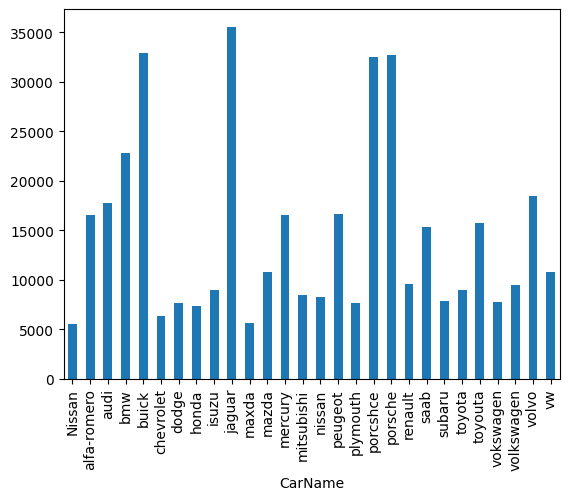

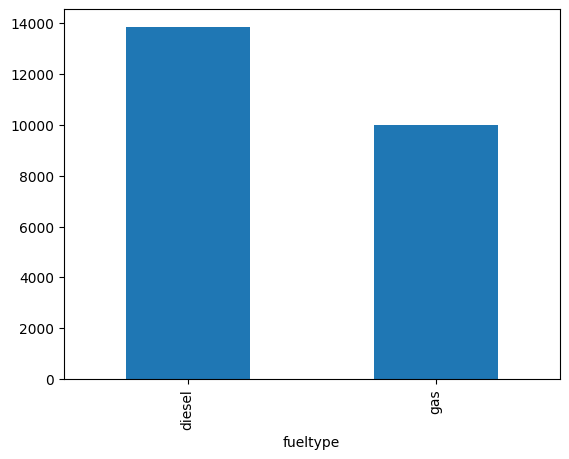

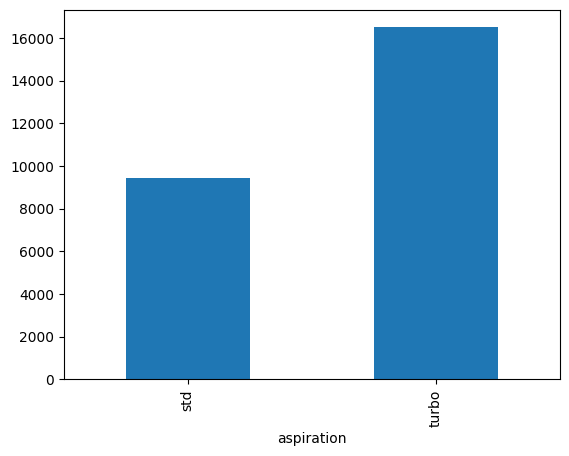

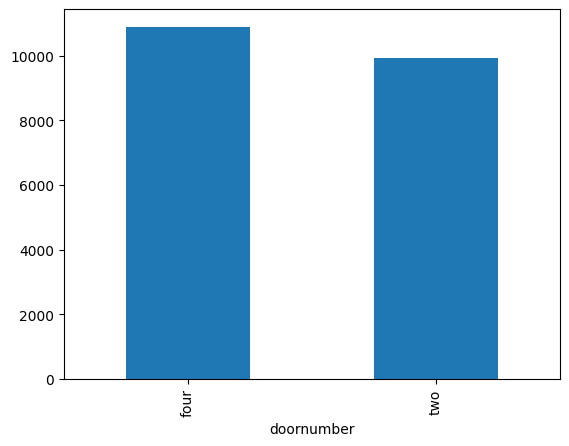

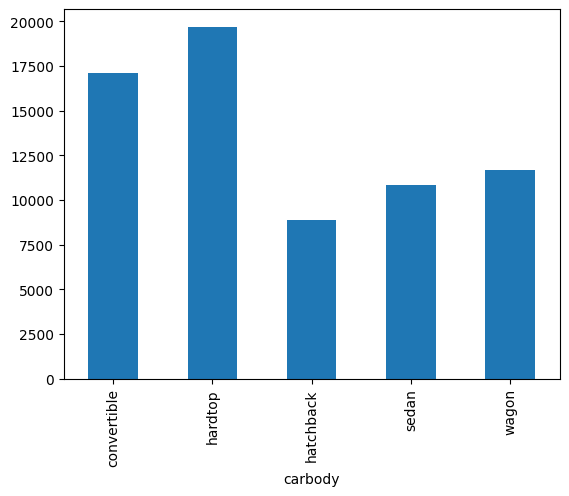

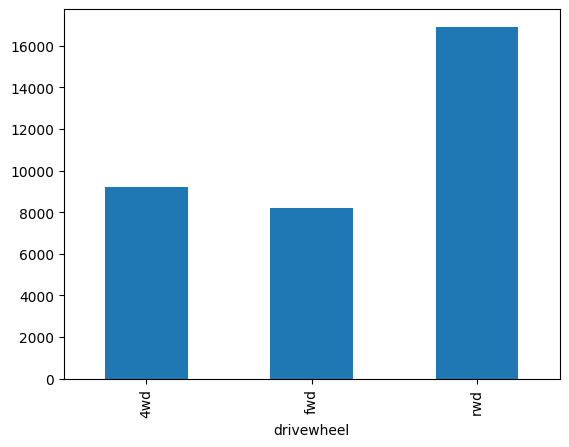

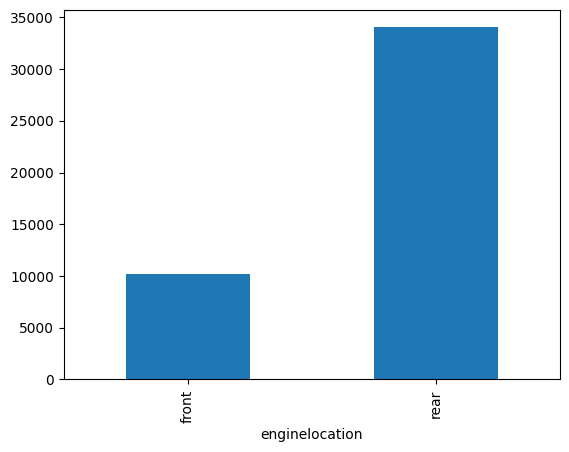

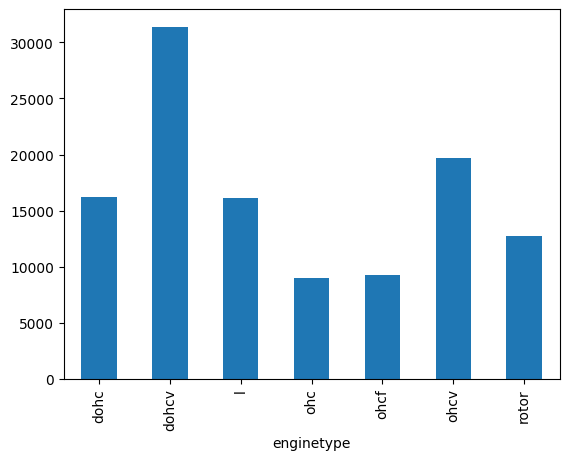

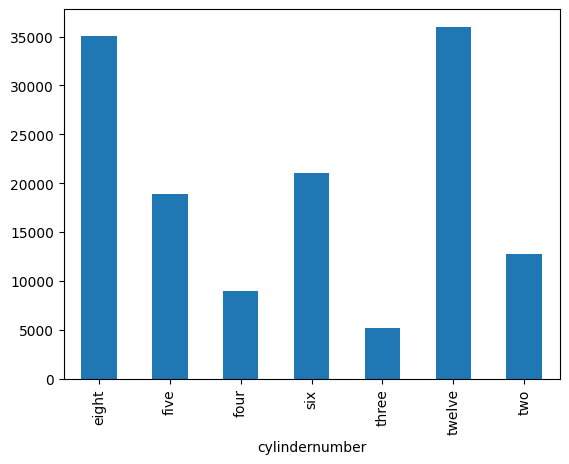

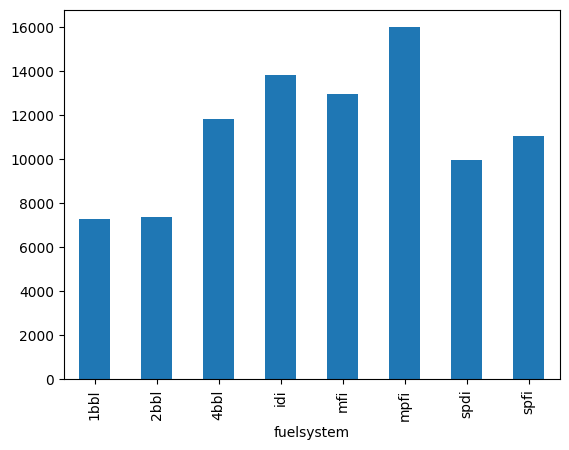

In [109]:
for i in cat_cols:
  df.groupby(i)['price'].median().plot(kind='bar')
  plt.show()

In [110]:
#here using OneHotEncoder will result in creation of too many columns resulting in more complextiy of the  model, so used Label Encoder
'''
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_cols:
  df[i]=le.fit_transform(df[i])
df.head()
'''
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False)
ohe_df=pd.DataFrame(ohe.fit_transform(df[cat_cols]),columns=ohe.get_feature_names_out())
df=pd.concat([df.drop(cat_cols,axis=1),ohe_df],axis=1)

In [111]:
df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,4.495355,168.8,4.175925,48.8,2548,4.875197,3.47,2.68,2.302585,4.718499,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,4.495355,168.8,4.175925,48.8,2548,4.875197,3.47,2.68,2.302585,4.718499,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4.559126,171.2,4.197202,52.4,2823,5.030438,2.68,3.47,2.302585,5.043425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.613138,176.6,4.207673,54.3,2337,4.700480,3.19,3.40,2.397895,4.634729,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4.609162,176.6,4.210645,54.3,2824,4.919981,3.19,3.40,2.197225,4.753590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [112]:
x=df.drop('price', axis=1)
y=df['price']

In [113]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='median')
x=si.fit_transform(x)
y = y.fillna(y.median())

In [114]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [115]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)
print("train accuracy liner regression: ",r2_score(y_train,y_pred_train))
print("test accuracy linear regression: ",r2_score(y_test,y_pred_test))

train accuracy liner regression:  0.9717267756323119
test accuracy linear regression:  0.8981028257935264


In [117]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_train=rf.predict(x_train)
y_pred_test=rf.predict(x_test)
print("train accuracy random forest: ",r2_score(y_train,y_pred_train))
print("test accuracy random forest: ",r2_score(y_test,y_pred_test))

train accuracy random forest:  0.9859715639138994
test accuracy random forest:  0.9578835674045344


In [118]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_train=dt.predict(x_train)
y_pred_test=dt.predict(x_test)
print("train accuracy decision tree: ",r2_score(y_train,y_pred_train))
print("test accuracy decision tree: ",r2_score(y_test,y_pred_test))

train accuracy decision tree:  0.9987687354624712
test accuracy decision tree:  0.9045475187449119
